# 2022 NZMSA Data Science Submission.

In [44]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

In [45]:
dataset = pd.read_csv("weather-data.csv")

dataset.info()

# Show the first five results.
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


The entire 'peak_wind_drct' column is null, and only 1204 non-null in 'gust', so I will drop the two columns. I will also drop station, since it's not going to be useful for our modelling. 

In [46]:
# describe stats for dataset
dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


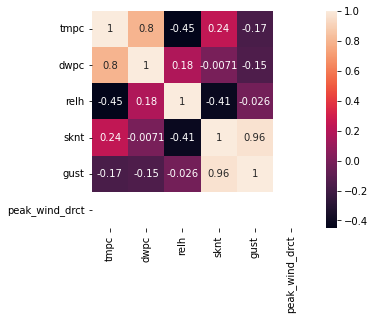

In [47]:
corrMatrix = dataset.corr()
sns.heatmap(corrMatrix, annot=True, square = True)
plt.show()

There doesn't seem to be a very strong correlation between a lot of the features, although 'sknt' and 'gust' have a very strong correlation of 0.96, and 'dwpc' and 'tmpc' have a correlation of 0.8. 

In [48]:
# convert valid to datetime format
dataset['valid'] = pd.to_datetime(dataset.valid)

# extract numerical values from datetime object
dataset['year'] = dataset['valid'].dt.year
dataset['month'] = dataset['valid'].dt.month
dataset['week'] = dataset['valid'].dt.week
dataset['day'] = dataset['valid'].dt.day
dataset['hour'] = dataset['valid'].dt.hour
dataset['minute'] = dataset['valid'].dt.minute
dataset['dayofweek'] = dataset['valid'].dt.dayofweek
dataset['date'] = dataset['valid'].dt.date


#dataset.drop(dataset.columns[[0, 6, 7]], inplace = True) <- This showed me that "station" is actually " station" 
dataset.drop(columns=[' station', 'gust', 'peak_wind_drct', 'valid'], inplace=True)

#drop na values
dataset.dropna(axis=0, inplace= True)

dataset.head()

C:\Users\Boetmate\AppData\Local\Temp\ipykernel_10316\259582386.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataset['week'] = dataset['valid'].dt.week


,tmpc,dwpc,relh,sknt,year,month,week,day,hour,minute,dayofweek,date
0,21.0,11.0,52.77,15.0,2015,1,1,1,0,0,3,2015-01-01
1,21.0,10.0,49.37,16.0,2015,1,1,1,0,30,3,2015-01-01
2,21.0,12.0,56.38,16.0,2015,1,1,1,1,0,3,2015-01-01
3,21.0,13.0,60.21,16.0,2015,1,1,1,1,30,3,2015-01-01
4,21.0,12.0,56.38,16.0,2015,1,1,1,2,0,3,2015-01-01


### Graph numerical data

    year  month        tmp
0   2015      1  20.708277
1   2015      2  19.776187
2   2015      3  19.379755
3   2015      4  16.747159
4   2015      5  13.940086
..   ...    ...        ...
67  2020      8  12.259259
68  2020      9  12.985396
69  2020     10  15.549865
70  2020     11  17.100418
71  2020     12  18.346074

[72 rows x 3 columns]


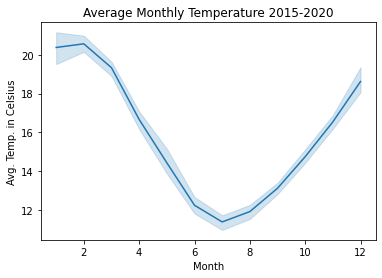

In [49]:
# group by month and year, find average temperature 
grouped_tmp = dataset.groupby(['year','month'])['tmpc'].mean().reset_index(name='tmp')

# plot graph over time 
monthly_temp = sns.lineplot(x = 'month', y = 'tmp',data = grouped_tmp)
monthly_temp.set_title("Average Monthly Temperature 2015-2020")
monthly_temp.set_xlabel("Month")
monthly_temp.set_ylabel("Avg. Temp. in Celsius")

print(grouped_tmp)

Text(0, 0.5, 'Avg. Temp. in Celsius')

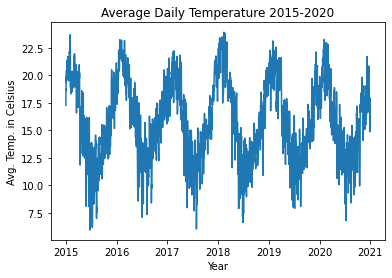

In [50]:
# group by date and average temperature 
dataset_dates = dataset.groupby(['date'])['tmpc'].mean().reset_index(name='tmp')

# plot graph over time 
daily_temp = sns.lineplot(x = 'date', y = 'tmp',data = dataset_dates)
daily_temp.set_title("Average Daily Temperature 2015-2020")
daily_temp.set_xlabel("Year")
daily_temp.set_ylabel("Avg. Temp. in Celsius")




Text(0, 0.5, 'Avg. Dew Point')

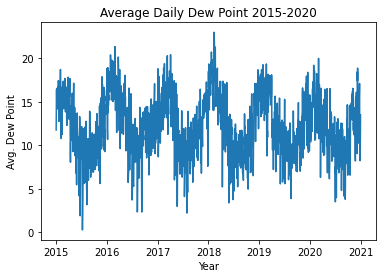

In [51]:
# group dataset by year, then calculate avg dwpc for the year

avg_dwpc = dataset.groupby(['date'])['dwpc'].mean().reset_index(name='dwpc')



# plot graph over time 
daily_dwpc = sns.lineplot(x = 'date', y = 'dwpc',data = avg_dwpc)
daily_dwpc.set_title("Average Daily Dew Point 2015-2020")
daily_dwpc.set_xlabel("Year")
daily_dwpc.set_ylabel("Avg. Dew Point")

,date,relh
0,2015-01-01,71.744792
1,2015-01-02,74.600417
2,2015-01-03,84.732708
3,2015-01-04,81.855417
4,2015-01-05,78.601667


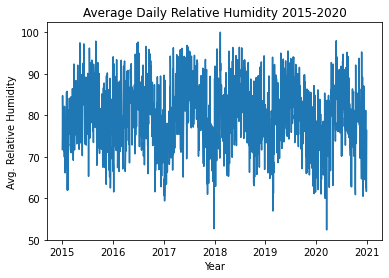

In [52]:
# group dataset by year, then calculate avg relh for the year

avg_relh = dataset.groupby(['date'])['relh'].mean().reset_index(name='relh')



# plot graph over time 
daily_relh = sns.lineplot(x = 'date', y = 'relh',data = avg_relh)
daily_relh.set_title("Average Daily Relative Humidity 2015-2020")
daily_relh.set_xlabel("Year")
daily_relh.set_ylabel("Avg. Relative Humidity")

avg_relh.head()

,date,sknt
0,2015-01-01,7.875000
1,2015-01-02,8.645833
2,2015-01-03,5.333333
3,2015-01-04,5.208333
4,2015-01-05,6.020833


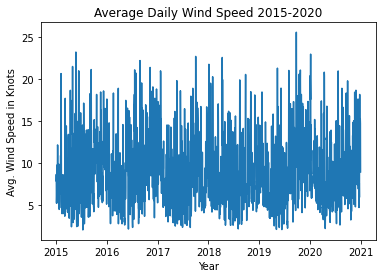

In [53]:
# group dataset by year, then calculate avg relh for the year

avg_sknt = dataset.groupby(['date'])['sknt'].mean().reset_index(name='sknt')



# plot graph over time 
daily_sknt = sns.lineplot(x = 'date', y = 'sknt',data = avg_sknt)
daily_sknt.set_title("Average Daily Wind Speed 2015-2020")
daily_sknt.set_xlabel("Year")
daily_sknt.set_ylabel("Avg. Wind Speed in Knots")

avg_sknt.head()

Looking at the graphs, the temperature seems to have the least variability and would likely be the best choice for making an accurate model. 

# Data Processing

In [54]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

dataset = pd.read_csv("weather-data.csv")


# convert 'valid' to datetime format
dataset['valid'] = pd.to_datetime(dataset.valid)

# extract numerical values from datetime object
dataset['year'] = dataset['valid'].dt.year
dataset['month'] = dataset['valid'].dt.month
dataset['week'] = dataset['valid'].dt.week
dataset['day'] = dataset['valid'].dt.day
dataset['hour'] = dataset['valid'].dt.hour
dataset['minute'] = dataset['valid'].dt.minute
dataset['dayofweek'] = dataset['valid'].dt.dayofweek

dataset.head()

#dataset.drop(dataset.columns[[0, 6, 7]], inplace = True) <- This showed me that "station" is actually " station" 
dataset.drop(columns=[' station', 'gust', 'peak_wind_drct', 'valid'], inplace=True)
#dataset.head()
#dataset.info()

#drop na values
dataset.dropna(axis=0, inplace= True)

C:\Users\Boetmate\AppData\Local\Temp\ipykernel_10316\998096562.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataset['week'] = dataset['valid'].dt.week


The RandomForest model will not accept the datetime format, so I had to convert the dates in the 'valid' column into numerical values. 

Since I'm going to be modeling temperature, I can drop all the columns except for my newly created columns (year, month, week, day, hour, minute, dayofweek) and 'tmpc'. 

# Data Modelling

In [55]:

dataset.info()
dataset.head()

# Define my target: temperature
y = dataset.tmpc 

# Define my x-values, or features
# weather_features = ['year','month', 'day','hour',	'minute','dayofweek']
weather_features = ['year','month', 'day']
X = dataset[weather_features]
X.describe()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Training and validation sets 
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

# Create Random Forest Model
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
val_predictions = forest_model.predict(val_X)

#Evaluating with MAE and R2
mean_absolute_error = mean_absolute_error(val_predictions,val_y)

print(f'The mean absolute error is {mean_absolute_error}')

forest_model_score = forest_model.score(val_X, val_y)

print(f'The score is {forest_model_score}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103584 entries, 0 to 103712
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   tmpc       103584 non-null  float64
 1   dwpc       103584 non-null  float64
 2   relh       103584 non-null  float64
 3   sknt       103584 non-null  float64
 4   year       103584 non-null  int64  
 5   month      103584 non-null  int64  
 6   week       103584 non-null  int64  
 7   day        103584 non-null  int64  
 8   hour       103584 non-null  int64  
 9   minute     103584 non-null  int64  
 10  dayofweek  103584 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 9.5 MB
The mean absolute error is 1.7549311546515507
The score is 0.7378968915590258


In [56]:
val_X.head()

,year,month,day
25412,2016,6,30
80621,2019,9,6
43607,2017,7,25
85886,2019,12,25
88709,2020,2,21


In [57]:
# Read the csv file with the dates for January 2021
future_df = pd.read_csv("jan_2021.csv")

# Predict the future!! 
future_predictions = forest_model.predict(future_df)

print(future_predictions)

# append future_predictions as a column 

[18.329037   19.83728086 18.15212943 17.46081145 18.33134777 17.31644315
 16.03740394 16.74998331 17.8297585  17.10155477 17.38994476 18.43078227
 18.52319135 17.08369506 19.1726561  19.3927738  18.9254504  19.01419741
 20.24987796 20.74532275 19.53195043 19.30556068 21.66056223 21.36729359
 21.55532283 20.40985739 21.42744282 22.10521631 22.21105655 22.0435968 ]


,year,month,day,future_predictions
count,30.0,30.0,30.000000,30.000000
mean,2021.0,1.0,15.500000,19.256383
std,0.0,0.0,8.803408,1.787519
min,2021.0,1.0,1.000000,16.037404
25%,2021.0,1.0,8.250000,17.910351
50%,2021.0,1.0,15.500000,19.093427
75%,2021.0,1.0,22.750000,20.661456
max,2021.0,1.0,30.000000,22.211057


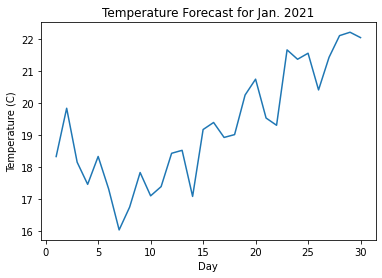

In [58]:
#add 'blocks' array as new column in DataFrame
future_df['future_predictions'] = future_predictions.tolist()


# plot future_df  
jan_tmpc_predicts = sns.lineplot(x = 'day', y = 'future_predictions',data = future_df)
jan_tmpc_predicts.set_title("Temperature Forecast for Jan. 2021")
jan_tmpc_predicts.set_xlabel("Day")
jan_tmpc_predicts.set_ylabel("Temperature (C)")

future_df.describe()


,tmpc,year,month,week,day,hour,minute,dayofweek
count,1486.000000,1486.0,1486.0,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000
mean,19.420592,2020.0,1.0,2.997981,15.985868,11.497308,14.979812,3.000000
std,2.861815,0.0,0.0,1.319880,8.944073,6.924678,15.005036,1.919596
min,12.000000,2020.0,1.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,17.000000,2020.0,1.0,2.000000,8.000000,5.250000,0.000000,1.000000
50%,19.000000,2020.0,1.0,3.000000,16.000000,11.500000,0.000000,3.000000
75%,21.000000,2020.0,1.0,4.000000,24.000000,17.000000,30.000000,5.000000
max,27.000000,2020.0,1.0,5.000000,31.000000,23.000000,30.000000,6.000000


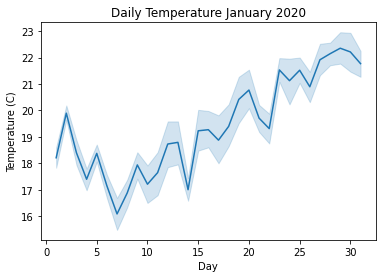

In [61]:
# compare to Jan 2020 temperature 

jan20_tmpc = dataset.drop(columns=['dwpc', 'relh', 'sknt'])

jan20_tmpc.drop(jan20_tmpc.index[jan20_tmpc['year'] != 2020], inplace=True)
jan20_tmpc.drop(jan20_tmpc.index[jan20_tmpc['month'] != 1], inplace=True)

# plot Jan 2020 temperature  
jan20_tmp_plot = sns.lineplot(x = 'day', y = 'tmpc',data = jan20_tmpc)
jan20_tmp_plot.set_title("Daily Temperature January 2020")
jan20_tmp_plot.set_xlabel("Day")
jan20_tmp_plot.set_ylabel("Temperature (C)")

jan20_tmpc.describe()

# Conclusion

The forest model score = 0.7379, meaning 73.79% of the variation in temperature is explained by the model.

The mean absolute error tells me that the model's predictions are off by an average of 1.75 degrees Celsius from the actual observed temperature. 

These are reasonably good scores given that the only independent variables in my model are month, day, and year. I visualized my Jan. 2021 predictions in the plot "Tempearture Forecast for Jan. 2021". I then created a plot of the previous year's January temperatures for comparison in "Daily Temperature January 2020", which looks quite similar to my predictions for Jan. 2021.  

Ideally, I'd be able to use the other columns from the weather dataset (relative humidity, dew point) to make a more accurate model. However, I can only pass in month, day, and year as variables into my model because I don't know what the relative humidity or dew point would be in January 2021. 

This was a big challenge but a LOT of fun! :) 